In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

%matplotlib notebook


# Descripcion del dataset
# el dataset insertado es de las estadisticas de los Pokemon, mostrando asi sus tipo de especie y status de el.

### 
    n                   => id pokemon
    Name                => nombre
    type 1              => elemento
    type 2              => segunfo elemento
    total               => cant en generacion
    hp                  => puntos de vida
    Attack 	            => puntos de ataque
    Defense             => puntos de defensa 
    Sp. Atk             => Velozidad de Speed
    Sp. Def             => Velozidad de Defenza
    Speed               => velozidad de movimiento
    Generation          => numero de generacion
    Legendary           => Legendario true/false


## Atribitos

In [6]:
datos = pd.read_csv('pokemon.csv',encoding = "ISO-8859-1")

In [7]:
# https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6

In [8]:
df = pd.DataFrame(datos)

In [9]:
df

,n,Name,type 1,type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,1,6,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,1,6,405,60,62,63,80,80,60,1,False
2,3,Venusaur,1,6,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,1,6,625,80,100,123,122,120,80,1,False
4,4,Charmander,2,0,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,12,9,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,12,9,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,11,13,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,11,16,680,80,160,60,170,130,80,6,True


In [10]:
df.isna().sum()

n             0
Name          0
type 1        0
type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

#### Estructura visualizacion 

In [11]:
# estado descriptivo
df.describe(include="all")

,n,Name,type 1,type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Bulbasaur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,7.306250,5.918750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,4.876955,6.952163,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,1.000000,0.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,3.000000,0.000000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,5.000000,1.000000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,11.000000,11.000000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


<IPython.core.display.Javascript object>


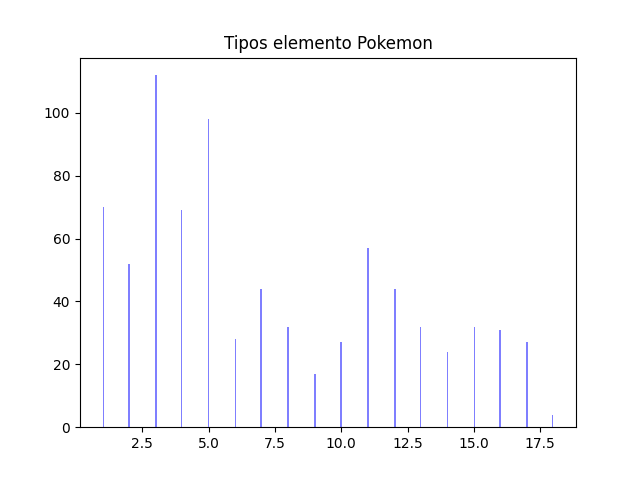

Text(0.5, 1.0, 'Tipos elemento Pokemon')

In [12]:
# visualizacion atributo tipo de pokemon
plt.figure(1)
plt.hist(df['type 1'], bins= 300, alpha=0.5, color = "blue")
plt.title('Tipos elemento Pokemon')

<IPython.core.display.Javascript object>


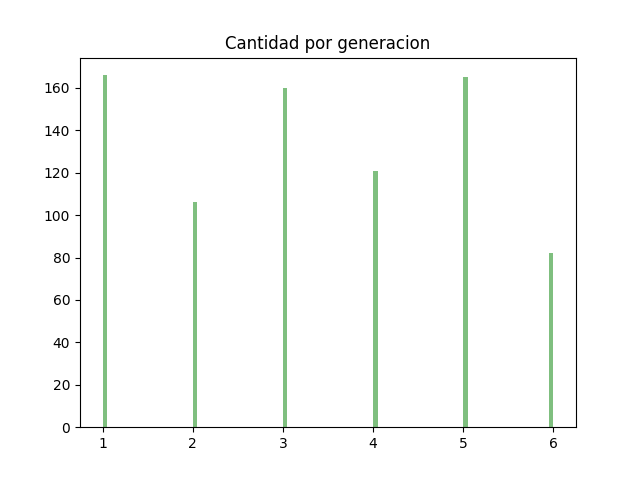

Text(0.5, 1.0, 'Cantidad por generacion')

In [13]:
# generacion por pokemon
plt.figure(2)
plt.hist(df['Generation'], bins= 100, alpha=0.5, color = "green")
plt.title('Cantidad por generacion')

In [14]:
df.columns

Index(['n', 'Name', 'type 1', 'type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### Discretizacion del atributo

In [15]:
df['type 1'] = pd.cut(df['type 1'], bins=4, labels=False)

#### encoder de los datos categoricos 

In [16]:

df_ = df.copy()

columns_ = df.select_dtypes(include = 'object').columns

labelencoder = LabelEncoder()

for i in columns_:
    df_[i] = labelencoder.fit_transform(df_[i])
    
df_.head()


,n,Name,type 1,type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,80,0,6,318,45,49,49,65,65,45,1,False
1,2,329,0,6,405,60,62,63,80,80,60,1,False
2,3,745,0,6,525,80,82,83,100,100,80,1,False
3,3,746,0,6,625,80,100,123,122,120,80,1,False
4,4,102,0,0,309,39,52,43,60,50,65,1,False


In [22]:
x = df['type 1']
y = df['Attack']

In [66]:
# particion de datos para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [27]:
# matriz de atributo
x = df_.iloc[:,10:34].values
# venctor
y = df_.iloc[:,6].values

In [28]:
pca = PCA(n_components = 3)
pca_f = pca.fit_transform(x)
X = pca_f.copy()
X.shape

(800, 3)

# 1 - Modelo K-MEANS 
#### 4 cluster tome como ejemplo el ejercicio

In [29]:
clusters = 4

In [30]:
kmeans = KMeans(n_clusters = clusters, init = 'random', random_state = 10, verbose =2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

Initialization complete
Iteration 0, inertia 234844.00000000006.
Iteration 1, inertia 106170.92637101459.
Iteration 2, inertia 82053.7008808656.
Iteration 3, inertia 77184.50862960579.
Iteration 4, inertia 74037.7220073575.
Iteration 5, inertia 73679.70283547902.
Iteration 6, inertia 73621.14937106022.
Iteration 7, inertia 73614.78640294557.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 200701.00000000003.
Iteration 1, inertia 87556.564209566.
Iteration 2, inertia 84554.21254122528.
Iteration 3, inertia 84533.32075761427.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 587829.0000000001.
Iteration 1, inertia 171444.81463410705.
Iteration 2, inertia 106285.47255752735.
Iteration 3, inertia 96891.13923885472.
Iteration 4, inertia 89154.64244240052.
Iteration 5, inertia 84869.96985315981.
Iteration 6, inertia 84535.7667318062.
Converged at iteration 6: center shift 0.010422159623185417 within tolerance

In [31]:
# visualizacion K-means clusters

<IPython.core.display.Javascript object>


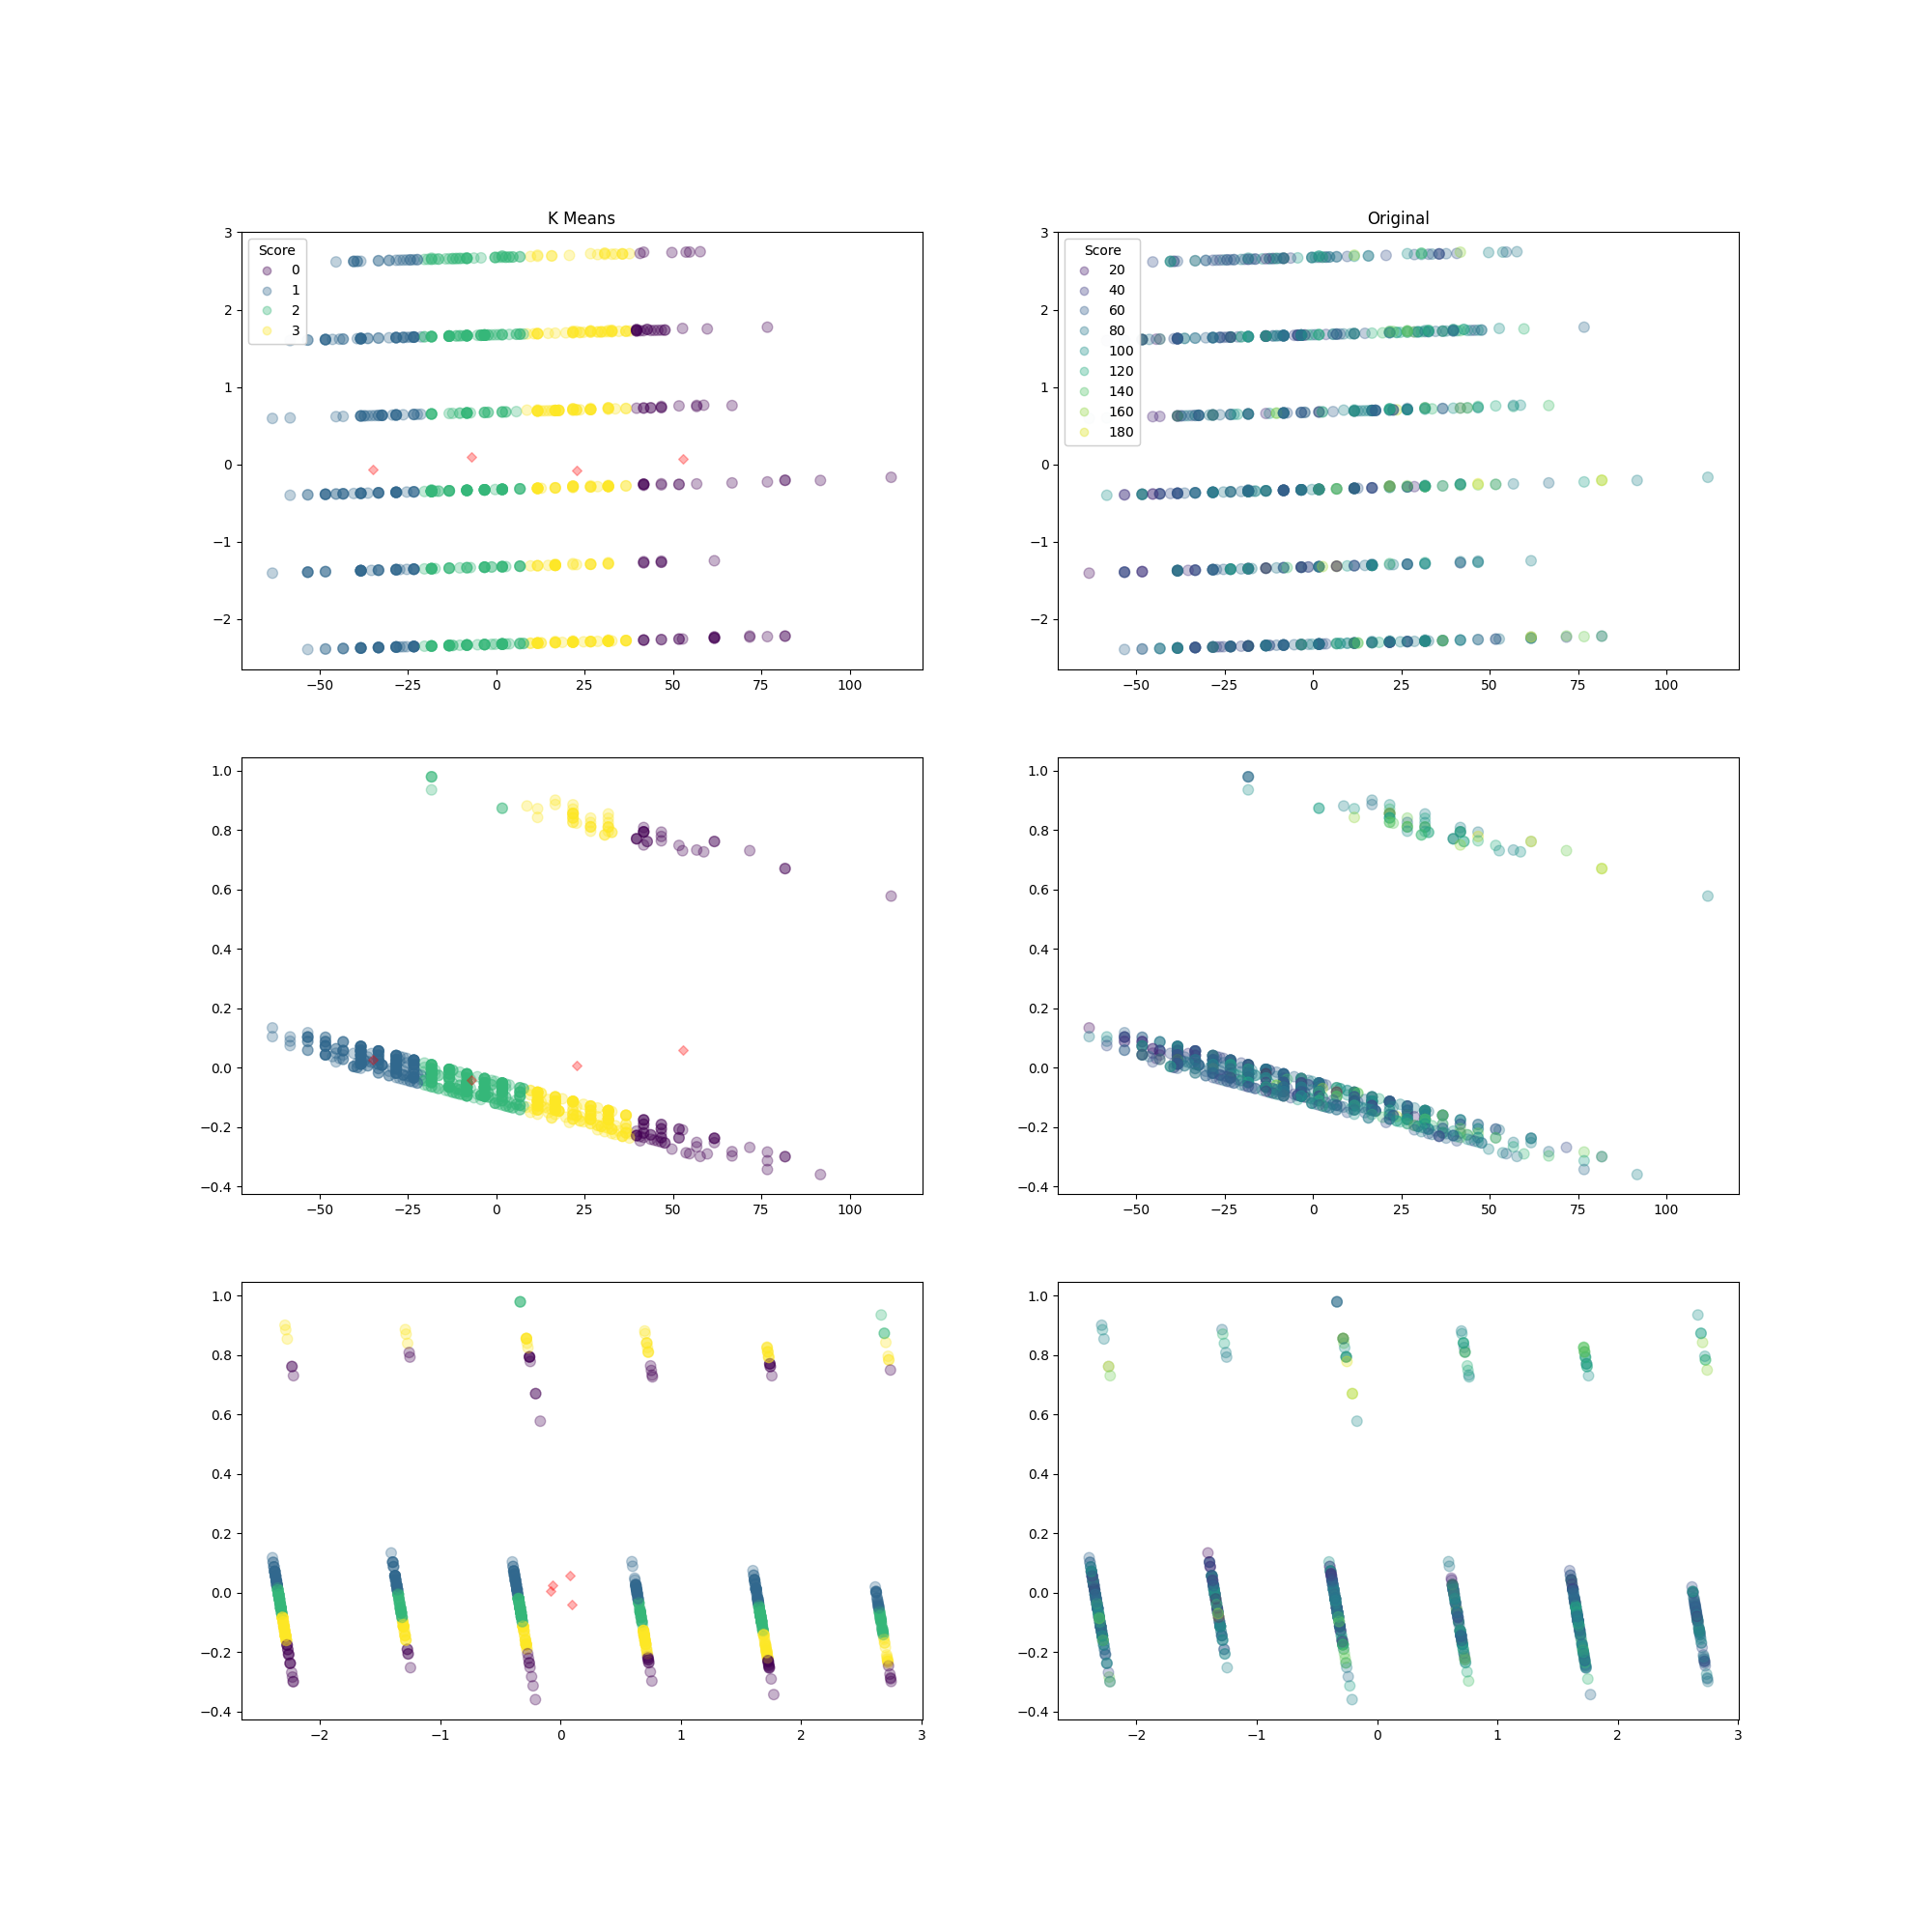

In [32]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (20,20), dpi=100)
ax[0,0].set_title('K Means')
l = ax[0,0].scatter(X[:,0], X[:,1], 
           c= kmeans.labels_.astype(float), 
           s=60, 
           alpha=0.3)
ax[0,0].scatter(centroids[:, 0], centroids[:, 1], 
           marker='D', 
           c='red', 
           s=25, 
           alpha=0.3)
ax[1,0].scatter(X[:,0], X[:,2], 
           c= kmeans.labels_.astype(float), 
           s=60, 
           alpha=0.3)
ax[1,0].scatter(centroids[:, 0], centroids[:, 2], 
           marker='D', 
           c='red', 
           s=25, 
           alpha=0.3)
ax[2,0].scatter(X[:,1], X[:,2], 
           c= kmeans.labels_.astype(float), 
           s=60, 
           alpha=0.3)
ax[2,0].scatter(centroids[:, 1], centroids[:, 2], 
           marker='D', 
           c='red', 
           s=25, 
           alpha=0.3)

ax[0,1].set_title('Original')
l2 = ax[0,1].scatter(X[:,0], X[:,1], 
           c= y, 
           s=60, 
           alpha=0.3)
ax[1,1].scatter(X[:,0], X[:,2], 
           c= y, 
           s=60, 
           alpha=0.3)
ax[2,1].scatter(X[:,1], X[:,2], 
           c= y, 
           s=60, 
           alpha=0.3)
legend1 = ax[0,0].legend(*l.legend_elements(),
                    loc="upper left", title="Score")
ax[0,0].add_artist(legend1)

legend2 = ax[0,1].legend(*l2.legend_elements(),
                    loc="upper left", title="Score")
ax[0,1].add_artist(legend2)


<IPython.core.display.Javascript object>


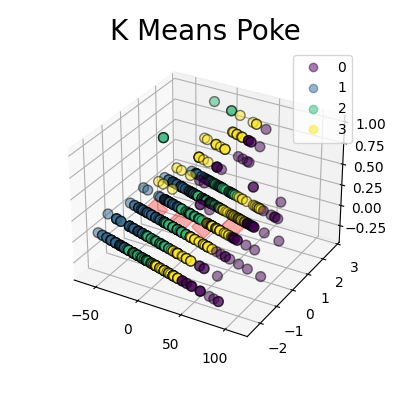

In [33]:
gif = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.axes(projection = "3d")
l3d = ax.scatter3D(X[:,0], X[:,1], X[:,2], c=kmeans.labels_.astype(float),alpha=0.5, edgecolor='k',s=50)
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           marker='D', 
           c='red', 
           s=150,alpha=0.3)
ax.set_title('K Means Poke',fontsize=20)

ax.legend(l3d.legend_elements()[0],[0,1,2,3])

<IPython.core.display.Javascript object>


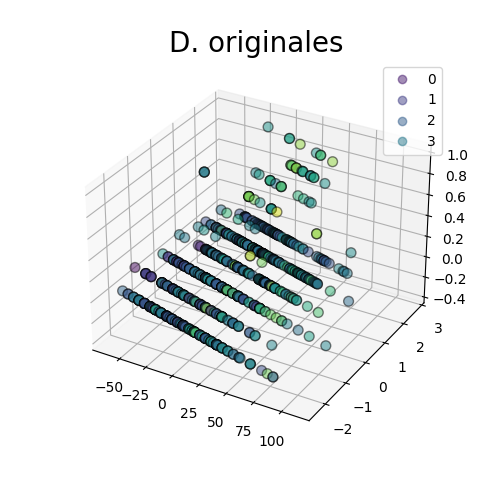

In [34]:
fig = plt.figure(figsize = (5, 5),dpi=100) 
ax = plt.axes(projection ="3d") 
l3d_ = ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y,alpha=0.5, edgecolor='k',s=50)
ax.set_title('D. originales',fontsize=20)

ax.legend(l3d_.legend_elements()[0],[0,1,2,3])

# 2 - CLUSTERING JERáRQUICO

In [35]:
x2 = StandardScaler().fit_transform(x)

In [36]:
x2

array([[-0.80150318, -1.39963712, -0.29738086],
       [-0.28501525, -1.39963712, -0.29738086],
       [ 0.40363531, -1.39963712, -0.29738086],
       ...,
       [ 0.05931003,  1.61195431,  3.36269123],
       [ 0.40363531,  1.61195431,  3.36269123],
       [ 0.05931003,  1.61195431,  3.36269123]])

In [37]:
pca2 = PCA(n_components = 3)
pca_f2 = pca2.fit_transform(x2)
X2 = pca_f.copy()
X2.shape

(800, 3)

# Modelo JERáRQUICO

<IPython.core.display.Javascript object>


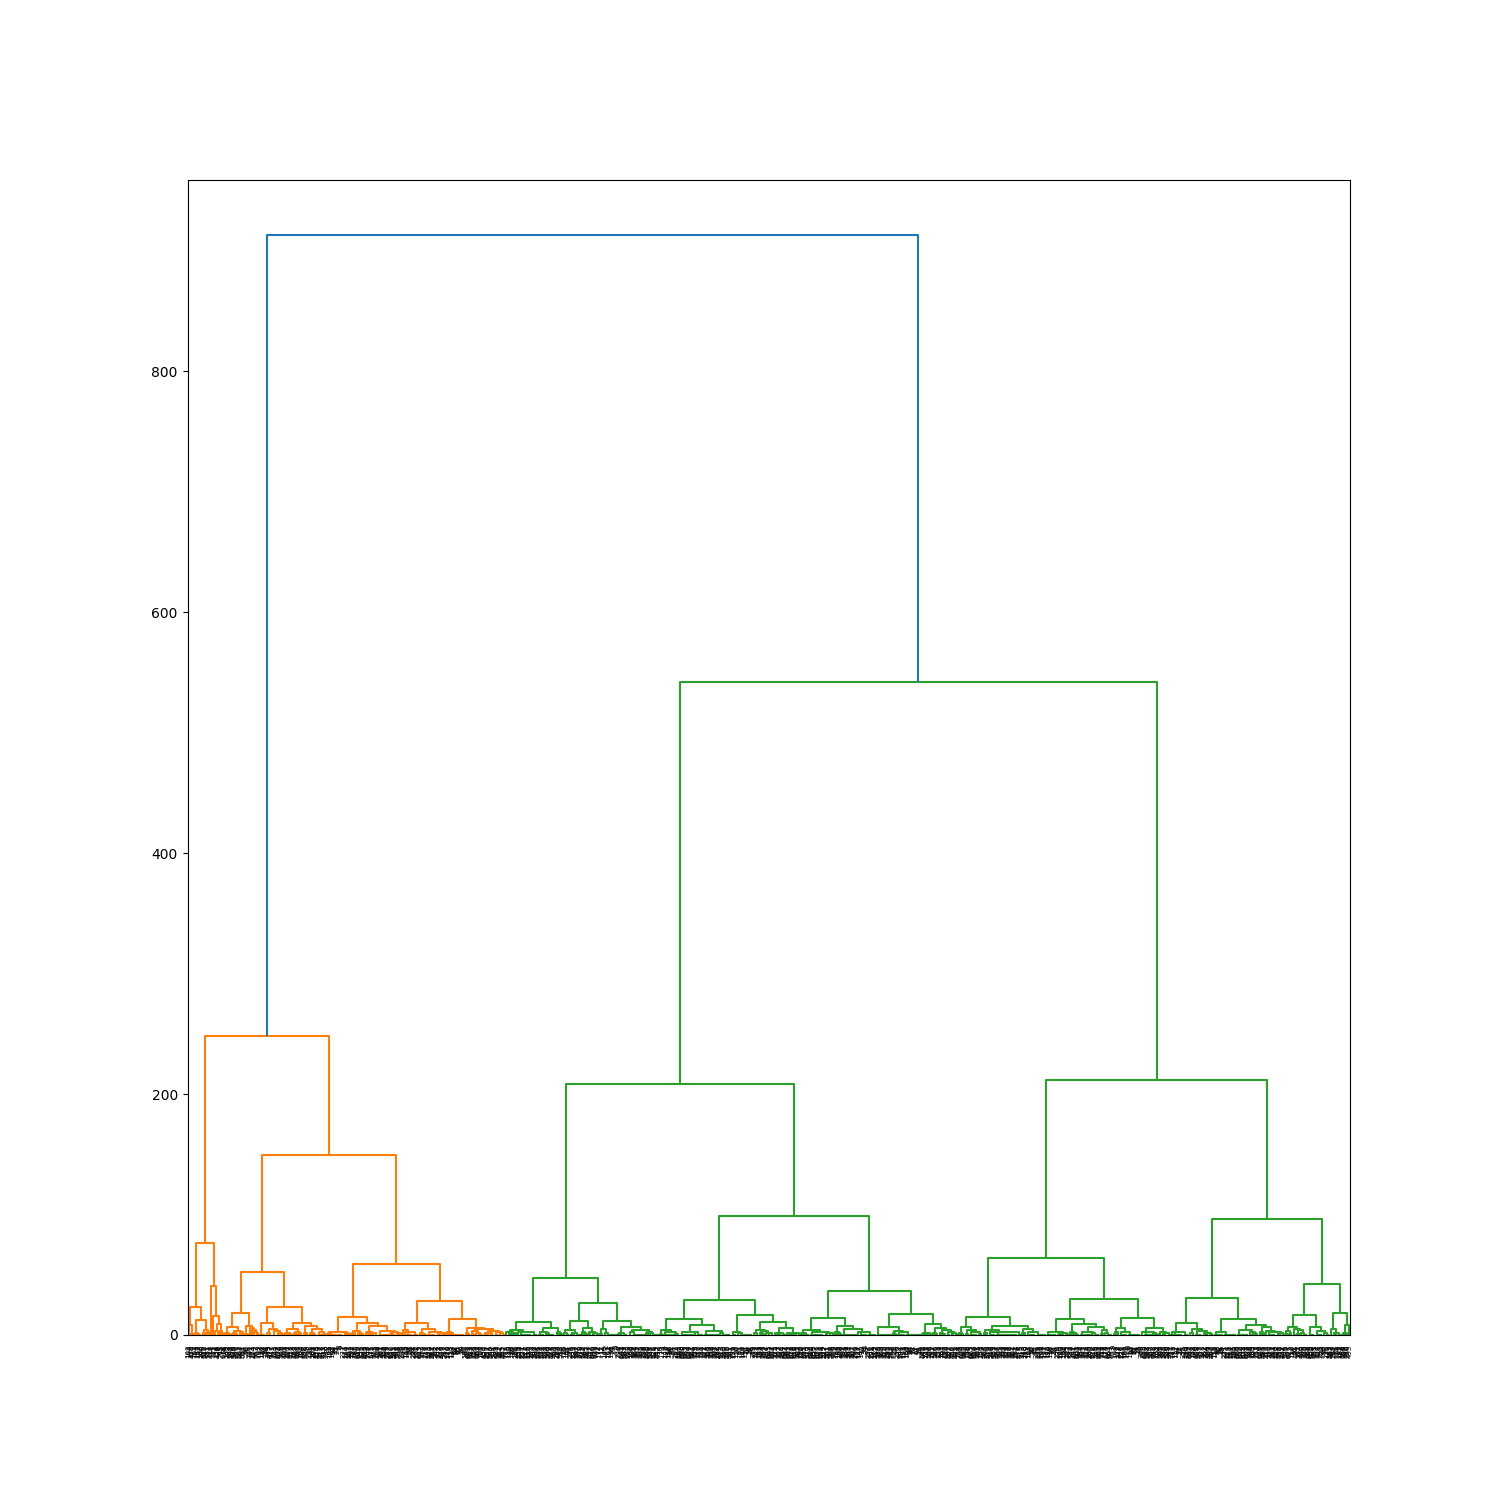

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [50.0, 50.0, 73.75, 73.75],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [112.5, 112.5, 142.5, 142.5],
  [61.875, 61.875, 127.5, 127.5],
  [20.0, 20.0, 94.6875, 94.6875],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [200.0, 200.0, 232.5, 232.5],
  [175.0, 175.0, 216.25, 216.25],
  [165.0, 165.0, 195.625, 195.625],
  [57.34375, 57.34375, 180.3125, 180.3125],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0

In [38]:
# dendograma, relacion jerarquico
link = linkage(X2, "ward")
label = (0,1,2,3)

plt.figure(figsize=(15, 15))
dendrogram(link)

In [39]:
# clusterirn jerarquico

In [40]:
# seleccione 4 por ejemplo a los videos
cluster2 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
cluster2.fit_predict(X2)

array([0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 3, 2, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 3, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 3, 2, 0, 2, 0, 2, 1, 3,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2, 0, 0, 2, 2, 2, 3,
       3, 0, 2, 1, 1, 0, 2, 2, 3, 3, 3, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 3, 2, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 3, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2,
       2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 3,

In [41]:
y_cj = cluster2.labels_
print(y_cj)

[0 2 2 2 2 2 1 1 1 0 2 2 2 0 0 2 0 0 2 3 2 2 1 1 2 1 2 1 2 2 1 1 0 2 0 2 2
 0 2 2 0 2 2 1 0 0 2 1 0 0 0 0 0 0 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 3 0 0
 2 0 2 2 2 1 0 0 0 1 1 0 0 0 0 2 2 2 1 0 2 0 0 0 2 2 1 1 3 2 0 2 0 2 1 3 0
 2 0 0 2 2 0 0 2 0 0 0 2 1 1 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 2 2 2 0 2 2 3 2
 0 0 2 2 2 3 3 0 2 1 1 0 2 2 3 3 3 1 0 2 2 2 2 1 0 2 2 0 1 0 2 2 2 0 0 3 2
 2 2 0 0 0 0 2 1 0 0 2 0 0 0 0 0 2 0 2 1 2 0 0 1 0 0 1 2 1 0 2 0 0 2 0 0 0
 2 0 0 0 0 2 2 2 0 2 2 1 0 2 0 0 0 0 0 2 0 2 2 2 2 1 1 2 0 0 2 2 2 0 2 2 1
 2 1 2 1 1 2 0 0 2 2 1 1 1 2 1 1 3 0 2 2 1 0 0 2 2 0 2 2 1 0 0 2 0 2 0 0 2
 0 2 2 2 3 2 2 0 0 2 1 2 2 0 2 0 1 1 0 3 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 2 2 1 2 1 3 1 1 2 2 2 0 2 2 1 1 2 2 0 0 0 0 2 2 2 0 2 1 0 2 0 2 2 1 2 2
 2 2 2 0 2 2 2 0 0 2 0 2 2 2 0 0 2 2 0 0 0 2 2 1 0 0 2 1 0 0 2 0 0 0 2 1 0
 0 1 1 0 0 2 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 3 3 1 3 0 0 2 2 2 1 0 0 2 2 2 1
 0 2 0 2 0 2 2 2 1 2 2 0 0 0 0 0 0 2 2 0 1 2 1 0 2 0 0 1 2 2 2 1 3 1 2 2 1
 0 2 2 0 0 0 2 0 1 0 0 2 

<IPython.core.display.Javascript object>


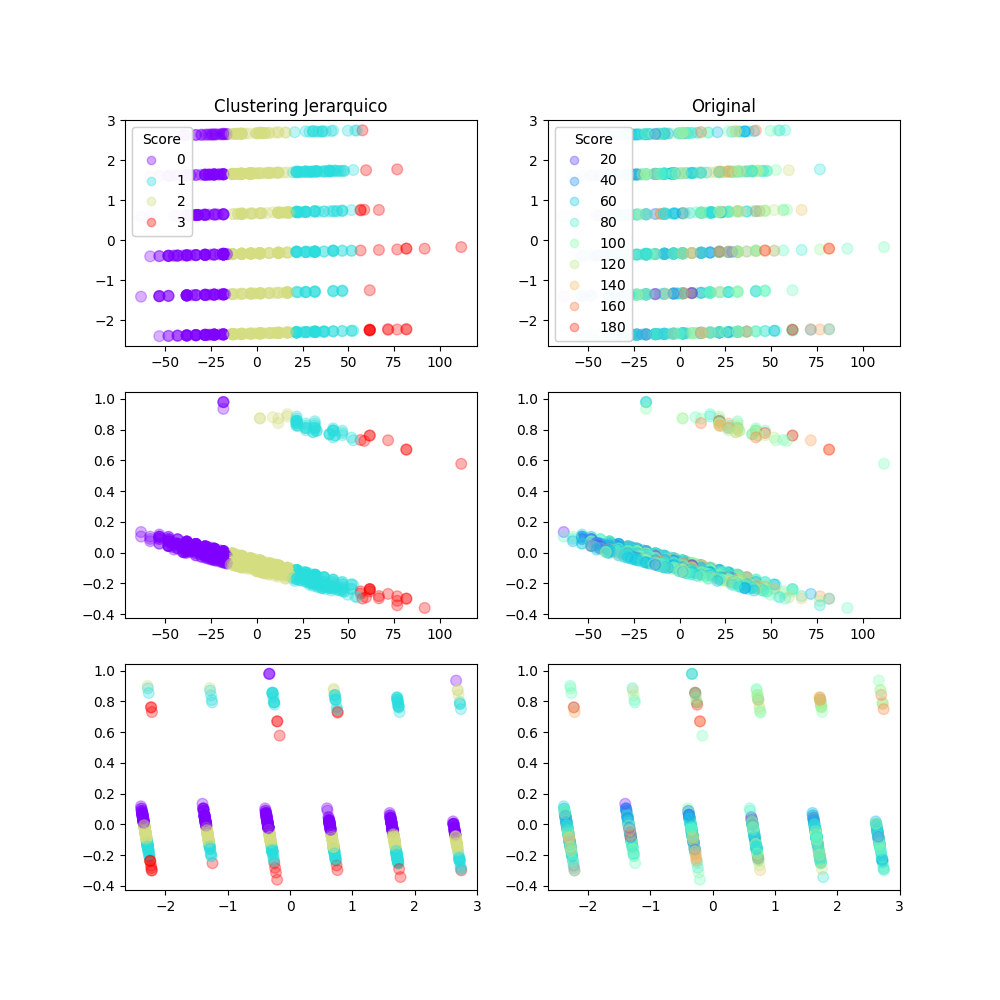

In [42]:
# Viuzalizacion Clustering jerarquico 2D, encotrando los clusters
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10), dpi=100)
ax[0,0].set_title('Clustering Jerarquico')
l = ax[0,0].scatter(X[:,0], X[:,1], 
           c= y_cj, 
           s=60, 
           alpha=0.3, cmap='rainbow')
ax[1,0].scatter(X[:,0], X[:,2], 
           c= y_cj, 
           s=60, 
           alpha=0.3, cmap='rainbow')
ax[2,0].scatter(X[:,1], X[:,2], 
           c= y_cj, 
           s=60, 
           alpha=0.3, cmap='rainbow')

ax[0,1].set_title('Original')
l2 = ax[0,1].scatter(X[:,0], X[:,1], 
           c= y, 
           s=60, 
           alpha=0.3, cmap='rainbow')
ax[1,1].scatter(X[:,0], X[:,2], 
           c= y, 
           s=60, 
           alpha=0.3, cmap='rainbow')
ax[2,1].scatter(X[:,1], X[:,2], 
           c= y, 
           s=60, 
           alpha=0.3, cmap='rainbow')
legend1 = ax[0,0].legend(*l.legend_elements(),
                    loc="upper left", title="Score")
ax[0,0].add_artist(legend1)

legend2 = ax[0,1].legend(*l2.legend_elements(),
                    loc="upper left", title="Score")
ax[0,1].add_artist(legend2)

<IPython.core.display.Javascript object>


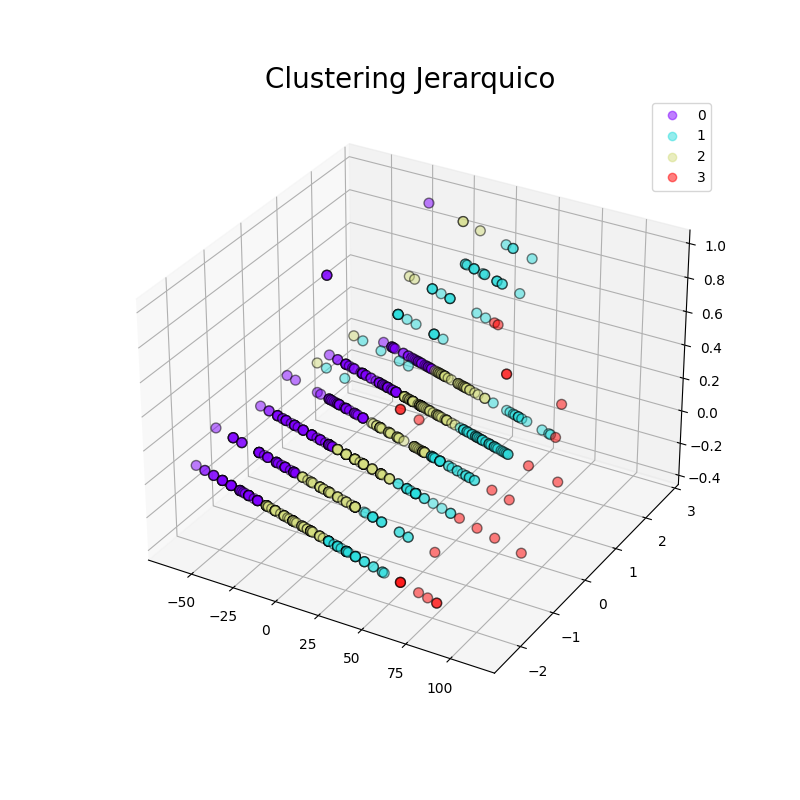

In [43]:
# Viuzalizacion Clustering jerarquico 3D
fig2 = plt.figure(figsize = (8, 8),dpi=100) 
ax = plt.axes(projection ="3d") 
l3d = ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y_cj,alpha=0.5, edgecolor='k',s=50, cmap='rainbow')
ax.set_title('Clustering Jerarquico',fontsize=20)

ax.legend(l3d.legend_elements()[0],[0,1,2,3])

# Dividir dataset entre training y testing set
### Se selecciona aleatoriamente el 70% training y 30% testing

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


In [45]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance',algorithm='kd_tree')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', weights='distance')

# EVALUACION KNN

In [46]:
print('Accuracy : %0.3f' % (accuracy_score(y_test, model.predict(X_test), normalize=True)*100),'%')

Accuracy : 3.333 %


In [47]:
kf = KFold(n_splits=5)

In [48]:
acc_model = []

for train_idx, test_idx in kf.split(x):
    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = model.fit(X_train, y_train)

    acc_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)


In [49]:
fold = [i+1 for i in range(len(acc_model))]
scores = pd.DataFrame(np.array([fold,acc_model]).T,columns=['Folds','Accuracy'])
scores['Folds'] = scores['Folds'].astype(int)
scores['Accuracy'] = np.round(scores['Accuracy'], decimals=3)
scores.head()


,Folds,Accuracy
0,1,1.250
1,2,4.375
2,3,3.750
3,4,2.500
4,5,3.125


<IPython.core.display.Javascript object>


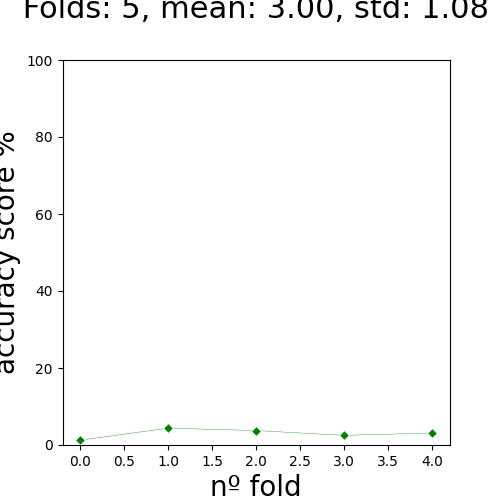

Text(0, 0.5, 'accuracy score %')

In [51]:
f, ax = plt.subplots(figsize=(5, 5))
ax = sns.lineplot(data=scores['Accuracy'], 
                 linewidth=0.25, 
                 color="g", 
                 marker="D", 
                 dashes=True,
                 ms = 5)
ax.set(ylim=(0, 100))
ax.set_title('Accuracy Score \n ---------------------- \n Folds: %i, mean: %.2f, std: %.2f \n' %
             (len(scores['Accuracy']),np.mean(scores['Accuracy']),np.std(scores['Accuracy'])),fontsize=22)
ax.set_xlabel('nº fold',fontsize=20)
ax.set_ylabel('accuracy score %',fontsize=20)